In [50]:
# Importar las librerías necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [44]:
# Cargar un dataset de ejemplo de dimensión 2
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, n_informative=2, n_repeated=0, random_state=42)



In [45]:

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
# Entrenar un SVM con kernel lineal
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
# Obtener los vectores de soporte
support_vectors = svm.support_vectors_
num_support_vectors = len(support_vectors)
print(f'Número de vectores de soporte: {num_support_vectors}')
print(f'Los vectores de soporte son:\n{support_vectors}')


Número de vectores de soporte: 4
Los vectores de soporte son:
[[ 0.63356167 -1.17278867]
 [ 0.51142713 -1.28981425]
 [ 0.15559223  0.14096222]
 [-0.85852241 -0.73473514]]


In [48]:

# Predecir y calcular la precisión
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Número de vectores de soporte: {num_support_vectors}')
print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')
print('Una precisión de 1.0 indica un modelo perfecto, mientras que una precisión de 0.0 indica un modelo completamente incorrecto.')

Número de vectores de soporte: 4
Precisión en el conjunto de prueba: 1.00
Una precisión de 1.0 indica un modelo perfecto, mientras que una precisión de 0.0 indica un modelo completamente incorrecto.


In [49]:

# Obtener los coeficientes del hiperplano (solo para kernel lineal)
coef = svm.coef_
intercept = svm.intercept_
print(f'Coeficientes del hiperplano: {coef}')
print(f'Intercepto del hiperplano: {intercept}')
print('Los coeficientes del hiperplano son los pesos asignados a cada característica en la función de decisión del SVM. El intercepto es el sesgo del hiperplano.')
print('El hiperplano es la frontera de decisión que separa las clases en un SVM con kernel lineal. Para un SVM con kernel no lineal, el hiperplano se encuentra en un espacio de mayor dimensión.')
print('El hiperplano tiene dimensiones igual al número de características en el dataset. Por ejemplo, en el dataset Iris, el hiperplano es un plano tridimensional en un SVM con kernel lineal.')




Coeficientes del hiperplano: [[-0.99317045  1.15015614]]
Intercepto del hiperplano: [0.99207475]
Los coeficientes del hiperplano son los pesos asignados a cada característica en la función de decisión del SVM. El intercepto es el sesgo del hiperplano.
El hiperplano es la frontera de decisión que separa las clases en un SVM con kernel lineal. Para un SVM con kernel no lineal, el hiperplano se encuentra en un espacio de mayor dimensión.
El hiperplano tiene dimensiones igual al número de características en el dataset. Por ejemplo, en el dataset Iris, el hiperplano es un plano tridimensional en un SVM con kernel lineal.


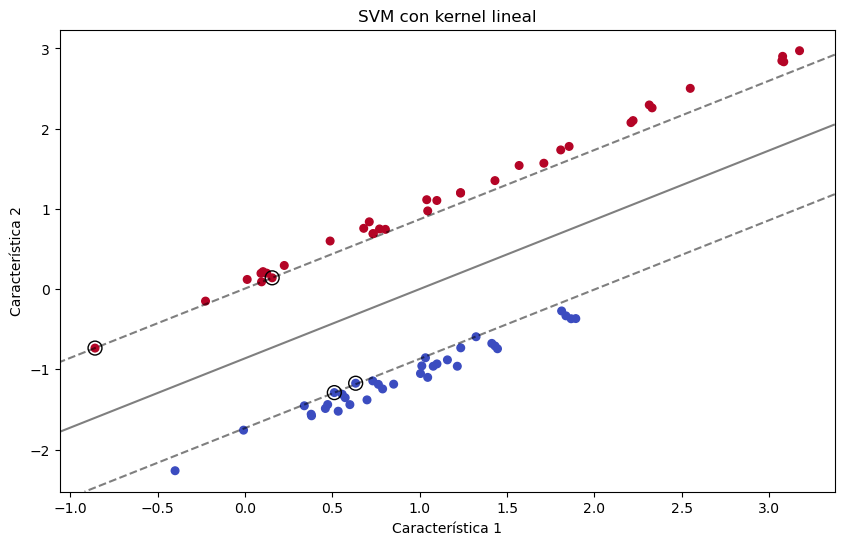

In [60]:

# Visualizar el hiperplano en un gráfico 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Visualizar el hiperplano
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Resaltar los vectores de soporte
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('SVM con kernel lineal')
plt.show()

